# Python für Aktuare Teil 4

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DeutscheAktuarvereinigung/Python_fuer_Aktuare/blob/main/04_python_visualization.ipynb) [![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/DeutscheAktuarvereinigung/Python_fuer_Aktuare/blob/main/04_python_visualization.ipynb)
## Agenda
Innerhalb dieses Notebooks behandeln wir:
- Einführung in Matplotlib
- Erweiterte Visualisierungen
- Seaborn für erweiterte Visualisierungen
- Eigenschaften gelungener Visualisierungen

# Einführung in Matplotlib und pyplot

`matplotlib.pyplot` ist eine zentrale Bibliothek in Python für die Visualisierung von Daten. Sie bietet eine einfache Schnittstelle zur Erstellung von 2D-Diagrammen und ist besonders nützlich, um Daten schnell und effektiv darzustellen. Von einfachen Liniendiagrammen bis hin zu komplexen Visualisierungen – mit `pyplot` können Sie eine Vielzahl von Diagrammtypen erstellen.

# Matplotlib und die Inspiration durch andere Tools

Matplotlib hat sich von verschiedenen Tools und Konzepten inspirieren lassen, darunter:

- **Gnuplot**: Ein traditionelles Visualisierungstool, das die Grundlage für viele Features von Matplotlib lieferte, insbesondere für einfache Plotting-Mechanismen.
  
- **ggplot (R)**: Eine weitere bedeutende Inspirationsquelle für Matplotlib, insbesondere für die Layer-basierte Struktur, die es ermöglicht, Plots schrittweise aufzubauen.

Matplotlib orientiert sich teilweise an der **Grammar of Graphics**, einem Konzept, das von Leland Wilkinson entwickelt wurde. Es beschreibt, wie grafische Darstellungen in mehreren Schichten organisiert werden: Daten, Ästhetiken (wie Farbe oder Größe), Geometrien (wie Linien oder Punkte), und Skalen (z. B. Achsen). Dieses System ermöglicht eine flexible und systematische Herangehensweise an die Datenvisualisierung.


## Grundlegende Funktionsweise

Um mit `matplotlib.pyplot` zu arbeiten, müssen Sie die Bibliothek zuerst importieren. Die grundlegende Syntax besteht darin, Daten an eine Diagrammfunktion wie `plot()` zu übergeben und dann die Funktion `show()` aufzurufen, um das Diagramm anzuzeigen:

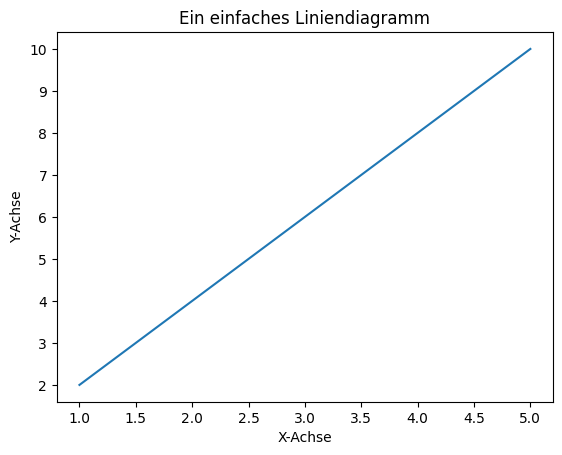

In [1]:
import matplotlib.pyplot as plt

# Beispiel: Einfache Liniengrafik
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

plt.plot(x, y)  # Erstellen eines Liniendiagramms
plt.title("Ein einfaches Liniendiagramm")  # Diagrammtitel hinzufügen
plt.xlabel("X-Achse")  # X-Achsenbeschriftung
plt.ylabel("Y-Achse")  # Y-Achsenbeschriftung
plt.show()  # Zeigt das Diagramm an


# Elemente einer Matplotlib-Figure

In `matplotlib` ist eine **Figure** das gesamte Bild oder die Darstellung, die Sie erzeugen. Eine Figure kann verschiedene Bestandteile haben, die im Folgenden beschrieben sind:

- **Figure**: Die gesamte Zeichnung oder das Bild, das Sie erzeugen. Eine Figure kann mehrere Unterplots enthalten.
  
- **Axes (Achsen)**: Der Bereich, in dem die Daten geplottet werden. Eine Figure kann eine oder mehrere Achsen (Subplots) haben.

- **Title (Titel)**: Der Titel des Plots, der das Diagramm beschreibt.

- **Labels (Achsenbeschriftungen)**: Beschriftungen der x- und y-Achsen, die die Bedeutung der Achsen verdeutlichen.

- **Legend (Legende)**: Erklärt die verschiedenen Datenreihen innerhalb des Plots.

- **Ticks (Achsenmarkierungen)**: Die Markierungen entlang der Achsen, die bestimmte Werte darstellen.

- **Subplots**: Mehrere Diagramme innerhalb einer Figure, die in einem Raster angeordnet sind.

Eine **Matplotlib-Figure** besteht also aus mehreren Komponenten, die individuell angepasst werden können, um aussagekräftige Datenvisualisierungen zu erstellen.

<img src="./images/anatomyMatplotFigure.webp" alt="anatomy of a figure" style="width:50%;">

Bevor wir uns verschiedene Diagrammarten anschauen, wollen wir erst einmal an einem sehr einfachen Beispiel die verschiedenen Elemente einer *Figure* manipulieren.

Dazu benötigen wir natürlich erst einmal Daten. Wir simulieren synthetische Schadensdaten:

In [2]:
import pandas as pd
import numpy as np

# Parameter für das Datenset
np.random.seed(42)
anzahl_eintraege = 400  # Anzahl der Schadensmeldungen
startdatum = pd.to_datetime('2020-01-01')
enddatum = pd.to_datetime('2023-12-31')
dates = pd.date_range(start=startdatum, end=enddatum, periods=anzahl_eintraege)

# Generiere synthetische Daten
contract_ids = np.random.randint(10000, 20000, anzahl_eintraege)
schadenhoehe = np.random.normal(loc=10000, scale=3000, size= anzahl_eintraege)
regionen = np.random.choice(['Nord', 'Ost', 'Süd', 'West'], anzahl_eintraege)
claim_types = np.random.choice(['earthquake', 'flood', 'hurricane', 'wildfire'], anzahl_eintraege)

# Schadenhöhe auf positive Werte beschränken und auf zwei Nachkommastellen runden
schadenhoehe = np.clip(schadenhoehe, 500, None)
schadenhoehe = np.round(schadenhoehe, 2)

# Erstelle DataFrame
naturschaden_df = pd.DataFrame({
    'Schadensdatum': dates,
    'contract_id': contract_ids,
    'Schadenhöhe': schadenhoehe,
    'Region': regionen,
    'claim_type': claim_types
})

# Ausgabe der ersten Zeilen des Datensets
print(naturschaden_df.head())


                  Schadensdatum  contract_id  Schadenhöhe Region  claim_type
0 2020-01-01 00:00:00.000000000        17270     15343.87   Nord   hurricane
1 2020-01-04 15:49:10.375939849        10860      7967.75   Nord       flood
2 2020-01-08 07:38:20.751879699        15390      5353.51    Ost   hurricane
3 2020-01-11 23:27:31.127819548        15191      8970.61   West  earthquake
4 2020-01-15 15:16:41.503759398        15734     10551.57   Nord   hurricane


Visualisieren wollen wir die Daten auf Monatsebene, also müssen wir gruppieren und pivotisieren:

In [3]:
# Gruppieren nach Jahr und Monat und Summieren der Schadenhöhe
naturschaden_df['Monat'] = naturschaden_df['Schadensdatum'].dt.to_period('M')
monats_gruppiert = naturschaden_df.groupby(['Monat', 'Region'])['Schadenhöhe'].sum().reset_index()

# Pivotieren des DataFrames, um Regionen als Spalten zu haben
pivot_df = monats_gruppiert.pivot(index='Monat', columns='Region', values='Schadenhöhe').fillna(0)
pivot_df.head()

Region,Nord,Ost,Süd,West
Monat,,,,
2020-01,56277.43,21757.43,14966.38,8970.61
2020-02,8221.35,25306.10,26173.24,10259.70
2020-03,11573.83,21795.17,48536.54,19561.10
2020-04,6896.79,23224.69,34423.75,39174.61
2020-05,39100.91,9665.74,16646.34,11340.67


Und jetzt geht es an Zeichnen:

In [4]:
# Visualisierung
plt.figure(figsize=(12, 6))

pass

plt.show()

<Figure size 1200x600 with 0 Axes>

Und jetzt das gleiche Schaubild nochmal aber mit einigen kleinen Veränderungen:

In [5]:
# Visualisierung
plt.figure(figsize=(12, 6))

pass 

plt.show()


<Figure size 1200x600 with 0 Axes>

Prinzipiell ist alles anpassbar. Der Code wird allerdings jedes mal komplexer...

## Weitere Diagramme
Bisher haben wir mit einem Liniendiagramm gearbeitet, es gibt aber, wie Sie wissen, deutlich mehr Arten von Diagrammen. Wir gehen jetzt immer mit einem Minimalbeispiel und ziemlich schnell durch die verschiedenen Diagramm-Arten durch. 

## Balkendiagramm

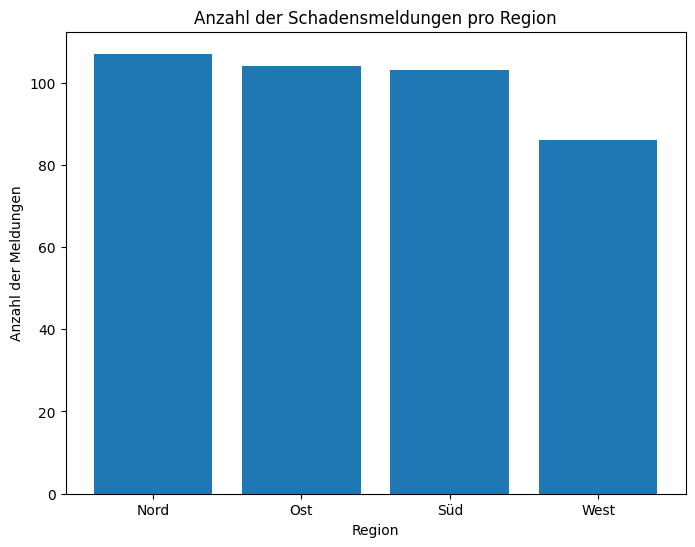

In [15]:
# Gruppiere die Daten nach Regionen und zähle die Schadensmeldungen
schaden_pro_region = naturschaden_df['Region'].value_counts()

# Erstelle das Balkendiagramm
plt.figure(figsize=(8, 6))
plt.bar(schaden_pro_region.index, schaden_pro_region.values)
plt.title('Anzahl der Schadensmeldungen pro Region')
plt.xlabel('Region')
plt.ylabel('Anzahl der Meldungen')
plt.show()

## Kuchen- / Kreisdiagramm

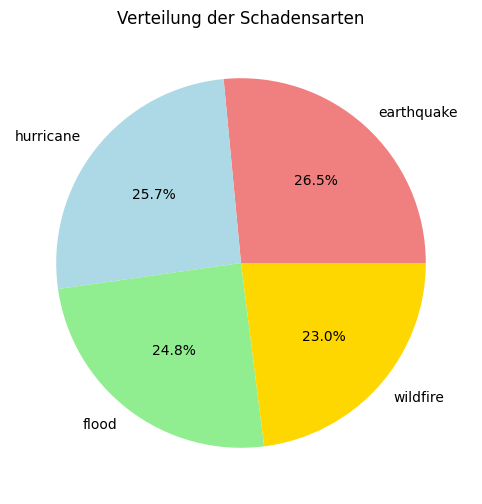

In [ ]:
# Gruppiere die Daten nach Schadensarten und zähle die Vorkommen
schaden_pro_claim_type = naturschaden_df['claim_type'].value_counts()

# Erstelle das Kuchendiagramm
plt.figure(figsize=(8, 6))
plt.pie(schaden_pro_claim_type.values, labels=schaden_pro_claim_type.index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue', 'lightgreen', 'gold'])
plt.title('Verteilung der Schadensarten')
plt.ylabel('')  # Entfernt die Beschriftung der Y-Achse
plt.show()

# Statistische Diagramme: Histogramm, Boxplot und Scatterplot

Neben den klassischen Visualisierungen wie Balken- und Kuchendiagrammen gibt es auch statistische Diagramme, die dabei helfen, die Verteilung und Streuung von Daten zu verstehen. Zu den gebräuchlichsten gehören Histogramme, Boxplots und Violinplots.

## Histogramm

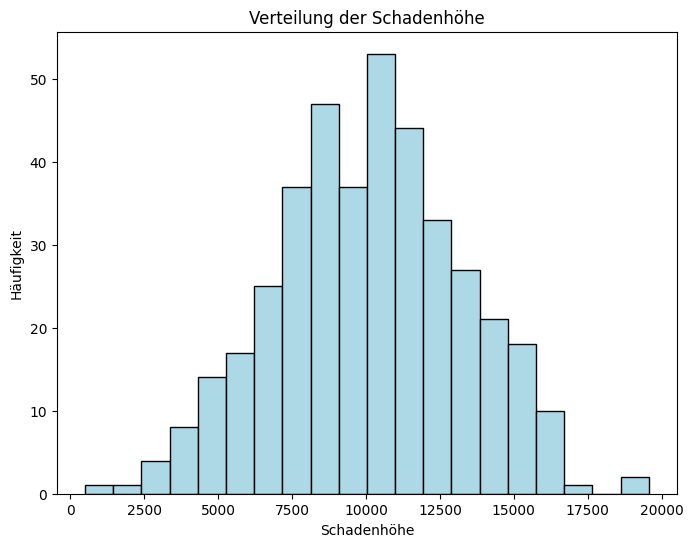

In [8]:
# Erstelle das Histogramm für die Schadenhöhe
plt.figure(figsize=(8, 6))
plt.hist(naturschaden_df['Schadenhöhe'], bins=20, color='lightblue', edgecolor='black')
plt.title('Verteilung der Schadenhöhe')
plt.xlabel('Schadenhöhe')
plt.ylabel('Häufigkeit')
plt.show()


# Boxplot

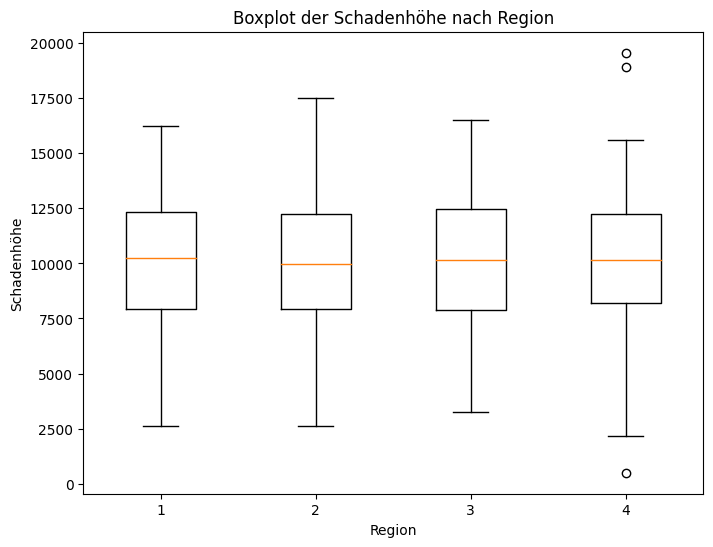

In [ ]:
# Erstelle den Boxplot für Schadenhöhe pro Region
# Daten gruppieren, Achtung, kleiner Trick nötig, damit matplotlib mit den Daten umgehen kann
schaden_pro_region = naturschaden_df.groupby('Region')['Schadenhöhe'].apply(list)

plt.figure(figsize=(8, 6))
plt.boxplot(schaden_pro_region)
plt.title('Boxplot der Schadenhöhe nach Region')
plt.suptitle('')  # Entfernt den zusätzlichen Titel
plt.xlabel('Region')
plt.ylabel('Schadenhöhe')
plt.show()


## Scatterplot

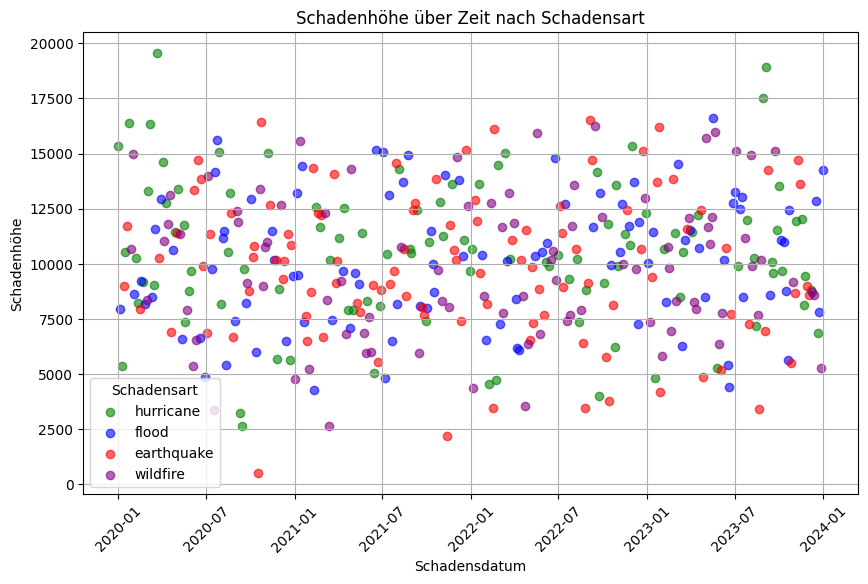

In [10]:
# Farben für die verschiedenen Schadensarten
farben = {'earthquake': 'red', 'flood': 'blue', 'hurricane': 'green', 'wildfire': 'purple'}

plt.figure(figsize=(10, 6))

# Streudiagramm mit verschiedenen Farben für jede Schadensart
for claim in naturschaden_df['claim_type'].unique():
    subset = naturschaden_df[naturschaden_df['claim_type'] == claim]
    plt.scatter(subset['Schadensdatum'], subset['Schadenhöhe'], 
                c=farben[claim], label=claim, alpha=0.6)

# Diagramm anpassen
plt.title('Schadenhöhe über Zeit nach Schadensart')
plt.xlabel('Schadensdatum')
plt.ylabel('Schadenhöhe')
plt.legend(title='Schadensart')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


## Aufgabe: Erstellen Sie verschiedene Schaubilder mit matplotlib

Sie haben nun die Grundlagen von matplotlib kennengelernt. Erstellen Sie für den bereitgestellten Datensatz **naturschaden_df** folgende Schaubilder, um verschiedene Aspekte der Daten zu visualisieren:

1. **Liniendiagramm**: Visualisieren Sie die Entwicklung der Schadenshöhe über die Zeit. Gruppieren Sie dabei nach den verschiedenen Regionen. Passen Sie die folgenden Elemente an:
   - Farben und Linienstile (z.B. gestrichelte Linie, dickere Linien).
   - Beschriftungen der x- und y-Achse (Axis Labels).
   - Titel für das Diagramm.
   - Verschieben Sie die Legende an eine sinnvolle Position.
   - Heben Sie eine einzelne Linie (z.B. die Region "Nord") visuell hervor.
   
2. **Balkendiagramm (Barplot)**: Stellen Sie die durchschnittliche Schadenshöhe für jede Region dar. Achten Sie darauf:
   - Einen passenden Titel und Beschriftungen zu setzen.
   - Die Balken in verschiedenen Farben darzustellen.
   
3. **Kreisdiagramm (Pie Chart)**: Erstellen Sie ein Kreisdiagramm, das die Verteilung der Schadensmeldungen auf die Regionen visualisiert. Verwenden Sie geeignete Farben und fügen Sie eine Legende hinzu.

4. **Streudiagramm (Scatterplot)**: Visualisieren Sie den Zusammenhang zwischen der Schadenhöhe und der Anzahl der Tage seit dem Versicherungsbeginn (1.1.2020). Passen Sie an:
   - Farben der Punkte nach der Region.
   - Setzen Sie Markierungen für die Datenpunkte.
   - Fügen Sie Titel und Achsenbeschriftungen hinzu.
   - Heben Sie einen Datenpunkt (z.B. den höchsten Schaden) mit einer Annotation hervor.

In jedem der Diagramme sollten Sie zusätzlich:
   - Die Ticks (Skalenstriche) auf den Achsen anpassen, um eine übersichtliche Darstellung zu gewährleisten.
   - Die Achsenbeschriftungen (x- und y-Achse) sowie den Titel sinnvoll setzen.

Nutzen Sie die bisherigen Erklärungen und Beispiele, um diese Aufgabe erfolgreich zu lösen. Experimentieren Sie auch mit weiteren Anpassungen!


# Seaborn
Mit matplotlib kommt man relativ schnell an Grenzen, insbesondere wenn es um komplexere Visualisierungen oder die Ästhetik der Plots geht. An dieser Stelle kommt Seaborn ins Spiel, eine Bibliothek, die auf matplotlib aufbaut und speziell für statistische Grafiken entwickelt wurde.

Seaborn bietet folgende Vorteile:

- **Einfache Erstellung von komplexen Diagrammen**: Diagramme wie Heatmaps, Korrelationstabellen oder Violinplots können mit wenigen Zeilen Code erstellt werden.
- **Verbesserte Ästhetik**: Die Diagramme sehen standardmäßig ansprechender aus als bei matplotlib.
- **Eingebaute Unterstützung für Pandas-Daten**: Seaborn kann direkt mit DataFrames arbeiten und erkennt Spalten als Dimensionen.
- **Automatische Aggregation und Ausgleich**: Seaborn kann Daten auf einfache Weise aggregieren und glättet oft automatisch Kurven für bessere Lesbarkeit.

## Installation
Bevor wir Seaborn verwenden können, muss die Bibliothek installiert/importiert werden:

```bash
pip install seaborn


In [11]:
import seaborn as sns

## Violinplot
Der Violinplot ist eine Weiterentwicklung des Boxplots. Zusätzlich zu den Daten aus dem Boxplot zeigt er eine Dichteverteilung der Daten an.

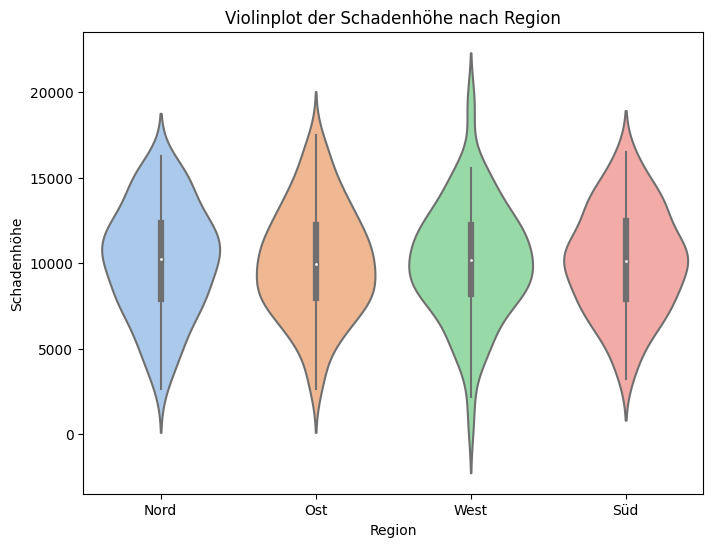

In [12]:
# Erstelle den Violinplot für Schadenhöhe pro Region
plt.figure(figsize=(8, 6))
sns.violinplot(x='Region', y='Schadenhöhe', data=naturschaden_df, palette='pastel')
plt.title('Violinplot der Schadenhöhe nach Region')
plt.xlabel('Region')
plt.ylabel('Schadenhöhe')
plt.show()


# Heatmap

Heatmaps bieten eine ausgezeichnete Möglichkeit, Matrixdaten zu visualisieren. Sie zeigen Werte in einem zweidimensionalen Gitter (Matrix), wobei die Farbintensität den Wert an jeder Position darstellt. In einem Versicherungsdatensatz könnte man Heatmaps verwenden, um z.B. Schadenshöhen in verschiedenen Regionen oder Zeiträumen zu vergleichen.

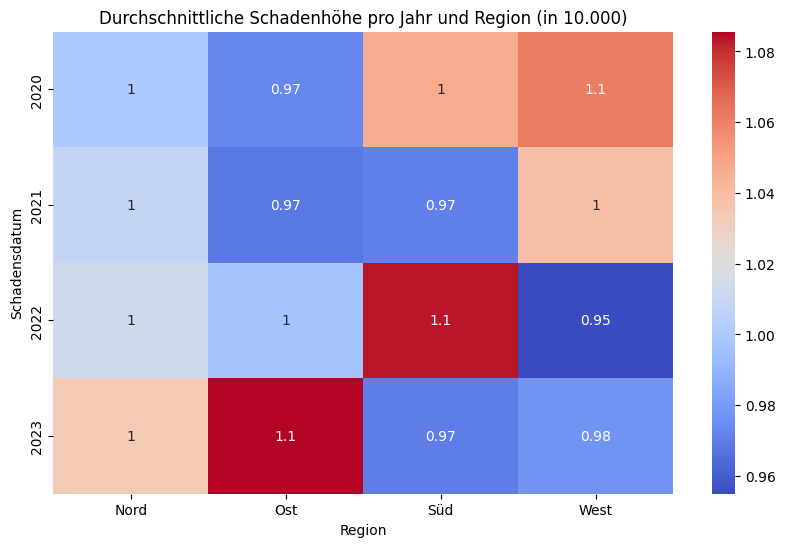

In [13]:
# Schadenhöhe nach Region und Schadensdatum aggregieren
heatmap_data = naturschaden_df.pivot_table(values='Schadenhöhe', 
                                           index=naturschaden_df['Schadensdatum'].dt.year, 
                                           columns='Region', aggfunc='mean') /10000

# Erstellen einer Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True)
plt.title("Durchschnittliche Schadenhöhe pro Jahr und Region (in 10.000)")
plt.show()

# Korrelationsplot

Korrelationsplots sind nützlich, um Beziehungen zwischen verschiedenen numerischen Variablen zu erkennen. Mit seaborn lässt sich die Korrelation in einem DataFrame leicht visualisieren. Sie helfen dabei, Zusammenhänge zwischen Variablen wie Schadenhöhe, Vertragsnummer, oder Versicherungsnummer darzustellen.

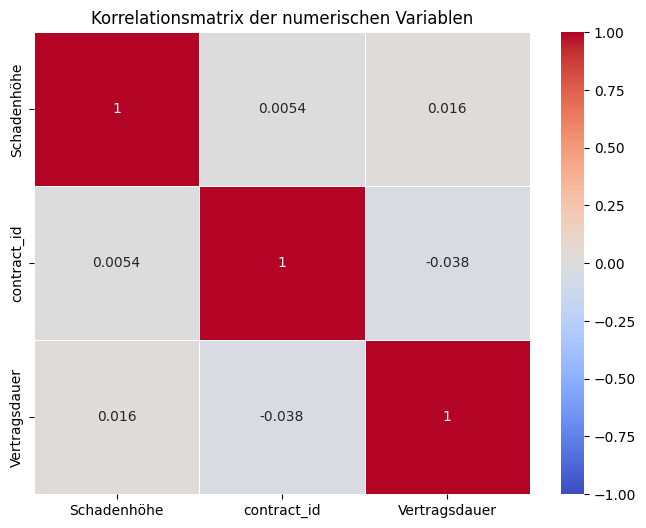

In [14]:
# Neue Spalte zur Vertragsdauer hinzufügen
naturschaden_df['Vertragsdauer'] = (naturschaden_df['Schadensdatum'] - pd.to_datetime('2020-01-01')).dt.days

# Auswahl der numerischen Variablen für die Korrelationsmatrix
numerische_variablen = ['Schadenhöhe', 'contract_id', 'Vertragsdauer']

# Berechnen der Korrelationsmatrix
korrelationsmatrix = naturschaden_df[numerische_variablen].corr()

# Visualisierung der Korrelationsmatrix als Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(korrelationsmatrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5)
plt.title("Korrelationsmatrix der numerischen Variablen")
plt.show()

## Fazit zu den bisherigen Visualisierungen

Wir haben uns in diesem Abschnitt eine Vielzahl von Visualisierungen angeschaut – von einfachen Liniendiagrammen über Balken- und Kreisdiagramme bis hin zu Scatterplots, Heatmaps und Korrelationsmatrizen. Diese Plots geben einen hervorragenden ersten Einblick in Daten und ermöglichen es, Muster, Zusammenhänge und Auffälligkeiten zu erkennen. 

Es gibt jedoch noch viele weitere Visualisierungsmöglichkeiten, die in der Analyse von Daten nützlich sein können, wie zum Beispiel:
- Hexbin-Plots für die Darstellung dichter Datenpunkte
- Pairplots für die Untersuchung von Variablenpaaren
- Zeitreihenplots für chronologische Daten

Die Welt der Visualisierung ist riesig, und **matplotlib** sowie **seaborn** bieten eine Vielzahl an Optionen, um nahezu jede Art von Diagramm zu erstellen. Um das volle Potenzial dieser Bibliotheken zu nutzen, lohnt es sich, die offizielle Dokumentation genauer zu studieren:

- [matplotlib Dokumentation](https://matplotlib.org/stable/contents.html)
- [seaborn Dokumentation](https://seaborn.pydata.org/)

Diese Dokumentationen bieten umfassende Informationen und Beispiele zu allen verfügbaren Diagrammtypen sowie zu spezifischen Anpassungsmöglichkeiten.


# Brainstorming Visualisierung

Bevor Sie gleich mit der Abschlussaufgabe zu Visualisierungen beginnen, machen wir noch ein schnelles Brainstorming zu Datenvisualisierung.
Bitte überlegen Sie sich Folgendes:
- Was **muss** ein Schaubild Ihrer Meinung nach immer beinhalten, um verständlich und informativ zu sein?
- Welche **Best-Practices** für die Erstellung von Schaubildern würden Sie Ihren Mitteilnehmern empfehlen?

# Beispiele gelungener Visualisierungen

1. Weltbevölkerung

<img src="./images/world-population-at-8-billion.jpg" alt="World Population" style="width:50%;">

Quelle: ([Visual Capitalist](https://www.visualcapitalist.com/visualized-the-worlds-population-at-8-billion/))

2. Plastik Müll

<img src="./images/Plastic-Waste-Pollution-scaled.jpg" alt="Plastic Waste" style="width:50%;">

Quelle: ([Behance Net](https://www.behance.net/gallery/106936329/Plastic-Waste-Pollution-data-visualisation))

3. Pandemie Geschichte

<img src="./images/HoP-Main-Graphic-03012023.jpg" alt="History of Pandemic" style="width:50%;">

Quelle: ([Visual Capitalist](https://www.visualcapitalist.com/history-of-pandemics-deadliest/))

4. Napoleons Russland Feldzug


<img src="./images/Minard.png" alt="History of Pandemic" style="width:100%;">

Quelle: ([Wikipedia](https://en.wikipedia.org/wiki/Charles_Joseph_Minard#/media/File:Minard.png))



## Abschlussaufgabe: Datenanalyse und Visualisierung

In dieser Aufgabe wenden Sie all das Wissen, das Sie bisher erworben haben, auf einen echten Datensatz an. Wählen Sie eines der folgenden Datensets aus:

- **Titanic Dataset** (`titanic_train.csv`)
- **OECD Insurance Indicators** (`OECD_insurance_indicators.csv`)
- **Car Insurance Claims** (`car_insurance_claim.csv`)
- **World Happiness Report** (`worldhappinessreport.csv`)

### Schritte:

1. **Datensatz laden:**  
   Laden Sie den von Ihnen gewählten Datensatz mit Pandas und verschaffen Sie sich einen ersten Überblick über die Datenstruktur. Nutzen Sie hierfür Methoden wie:
   - `head()`, `info()`, `describe()`
   - Welche Spalten und Daten gibt es? Wie sehen die ersten Einträge aus? Gibt es fehlende Daten?

2. **Daten explorieren:**  
   Stellen Sie sich Fragen wie:
   - Welche Beziehungen gibt es zwischen den Variablen?
   - Gibt es interessante Muster oder Ausreißer?
   - Finden Sie Korrelationen zwischen verschiedenen Spalten?

3. **Daten visualisieren:**  
   Erstellen Sie mehrere möglichst **schöne und aussagekräftige Schaubilder**, um Ihre Erkenntnisse visuell darzustellen. Nutzen Sie dabei:
   - **Liniendiagramme**: Um Trends oder Zeitreihen zu visualisieren.
   - **Kreisdiagramme**: Um Anteile oder Verteilungen darzustellen.
   - **Balkendiagramme**: Für Vergleichsdaten (z.B. zwischen Ländern, Kategorien).
   - **Scatterplots**: Um Beziehungen zwischen zwei numerischen Variablen zu veranschaulichen.

4. **Gestaltung der Visualisierungen:**  
   Achten Sie auf eine ansprechende Gestaltung der Diagramme:
   - Passen Sie Achsenbeschriftungen, Titel und die Legende an.
   - Verwenden Sie verschiedene Farben und Linienstile, um die Diagramme hervorzuheben.
   - Setzen Sie Markierungen oder Hervorhebungen an wichtigen Stellen (z.B. mit `annotate()` in matplotlib).

### Ziel:
Erstellen Sie eine zusammenhängende Präsentation Ihrer Datenanalyse mit mehreren Visualisierungen und beschreiben Sie, was Sie aus den Daten herauslesen konnten.
